## In-class practice for Lecture 13

* Statistics basics: Probability Distribution Functions and Monte Carlo Simulations
* Answer each question using Python codes in a separate cell

### 1. Normal distributions

The theoretical form for a normal distribution is:

$$P=f(x,\mu, \sigma)= \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}},-\infty < x < \infty$$

- Calculate the theoretical distribution of grades on an exam with a mean of 60 ($\mu = 60$) and a standard deviation of $\pm$ 15 ($\sigma = 15$). Assume the grades are integers between 0 and 100. 
- Use the **random.normal(mu,sigma,Nmc)** function to simulate the results of an exam taken by 35 students
- Calculate the mean and standard deviation of your simulated results. 
- Plot theoretical and simulated results as a bar graph and histogram respectively.
- Add a title, x-label, y-label, and legend
- To get As, students need to have a grade > 90. Now how many students in your simulation get As? Is it reasonable?

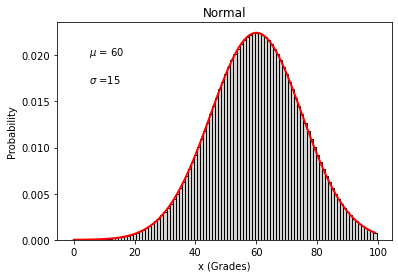

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
from scipy.special import factorial

def Normal(x,mu,sigma):
    """
    Normal Distribution Function
    """
    Prob = (1./(sigma*np.sqrt(2.**np.pi)))*np.e**(-(x-mu)**2/(2.*sigma**2))
    return Prob

mu,sigma,incr=60,15,1 # set the mean, standard deviation and bin width (1)
xs=np.arange(0,100,incr) # make an array of test values
Probability=Normal(xs,mu,sigma) # get probabilities 
plt.bar(xs,Probability,width=incr,color='lightgrey', edgecolor='k') # make the bar chart
plt.plot(xs,Probability,'r-',linewidth=2) # plot as a continuous probability distribution
plt.xlabel('x (Grades)')
plt.ylabel('Probability')
plt.text(5,.02,'$\mu$ = '+str(mu)) # stick on some notes
plt.text(5,.017,'$\sigma$ ='+str(sigma))
plt.title('Normal');

The mean grade of the 35 student is 62.53459812184488
The standard deviation of the 35 student is 13.921245886805231


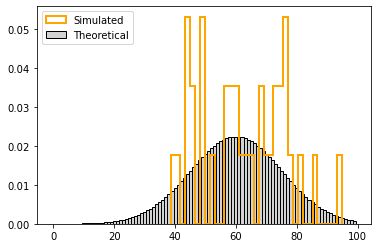

In [4]:
from numpy import random

# simulate a normal distribution iwht 35 students:

Nmc=35 # number of monte carlo simultions - here we need 35 students
Grade_Sim=random.normal(mu,sigma,Nmc) # get Nmc  simulated data points from distribution

print('The mean grade of the 35 student is',Grade_Sim.mean())
print('The standard deviation of the 35 student is',Grade_Sim.std())

plt.bar(xs,Probability,width=incr, edgecolor='k',label='Theoretical',color='lightgrey') # make the bar chart
plt.hist(Grade_Sim, density=True,histtype='step',color='orange',linewidth=2.,\
         bins=35,label='Simulated') # plot them
plt.legend();

In [5]:
# how many students get A? the criteria is Grade>80
Grade_A = Grade_Sim[Grade_Sim>80]
print('The number of students get A is',Grade_A.size,', which is',round(Grade_A.size/Nmc*100,2),'% of the total students')

The number of students get A is 3 , which is 8.57 % of the total students


### 2. Write a code to simulate the Roulette game

Recall the house advantage mentioned in class (e.g., the Roulette game). Let's use Python to simulate such a game and see if you can/cannot win. You can use the uniform() function, choices() function we talked about in class, or use the random module for such a simulation:

- load the module "random" using **import random**
- we will use the **randint** function from the _random_ module to generate a random integer between 0 and 38 (00, 0, 1, 2, 3, ..., 36, total = 38 numbers). For example randit(0,38) returns one integer between 0 and 38.
- now define a new variable as your **bet**, which is also an integer
- you can set your **bet** as a constant, or use the randint() function to set a random bet for every play
- then use relational operation to determine whether your bet is the same as the randint(0, 38) output
    - if **bet** is the same as the random integer generated by randint(), then you win 35 times more (35$\times bet$)
    - if **bet** is not the same as the random integer, you lose
    - then calculate how much you win (either 0 or bet\*35)
- use a for loop to simulate this game 100000 times to see if the expectation is approaching the theoretical value (-1/38) as discussed in class (-1/38)

In [40]:
from random import randint

bet = 10 # i'm fixing my bet every time for 10!
         # you can also do bet = randint(0,38) or others...
plays = 1000 # let's play 1000 times...
expect = 0 # total amount won
cost = 0 # total money spent
wins = 0 # total times of win

for _ in range(plays): 
    
    number = randint(0, 38) # generate a random number between 0 and 38, that's the wheel spinning
    expect = expect + (bet==number)*36*bet # for each play, if bet==number, then you win 35 times
    wins = wins + (bet==number) # count the total win times
    cost = cost + bet # count the total money spent (I'm doing this because bet can be changed randomly)

money_won = expect-cost # eventually how much I won...
win_rate = wins/plays # rate of winning, ~1/38

print('The total money spent is',cost)
print('After',plays,'plays, you won',expect)
print('Your total income is',money_won)

The total money spent is 10000
After 1000 plays, you won 9720
Your total income is -280
